In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# SCF98

I think this was a FM/FM junction... will have to check notes.

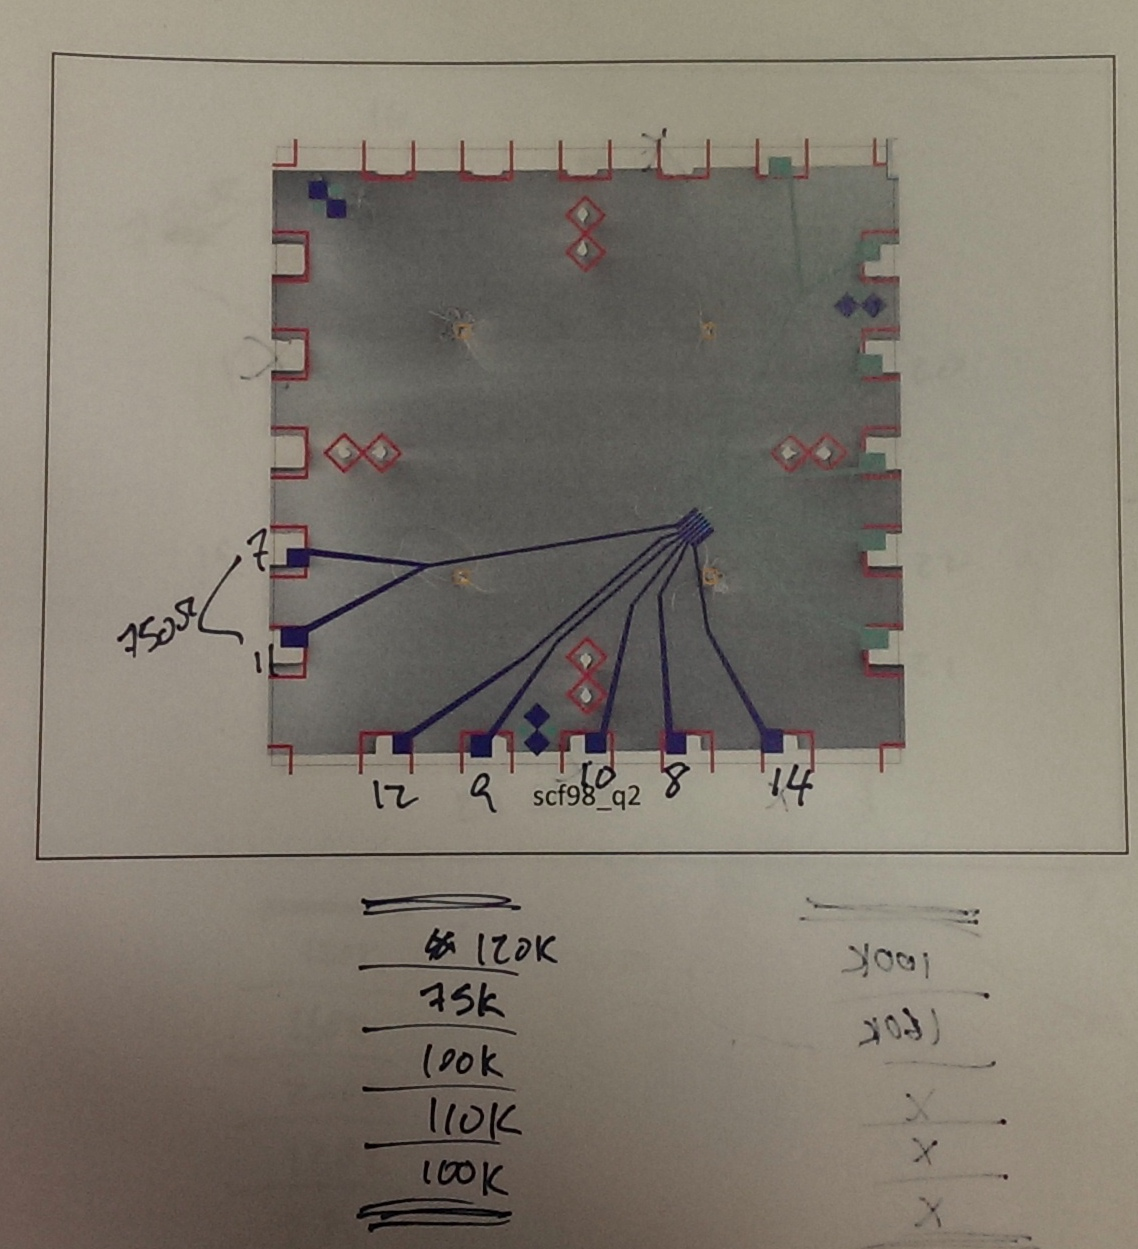

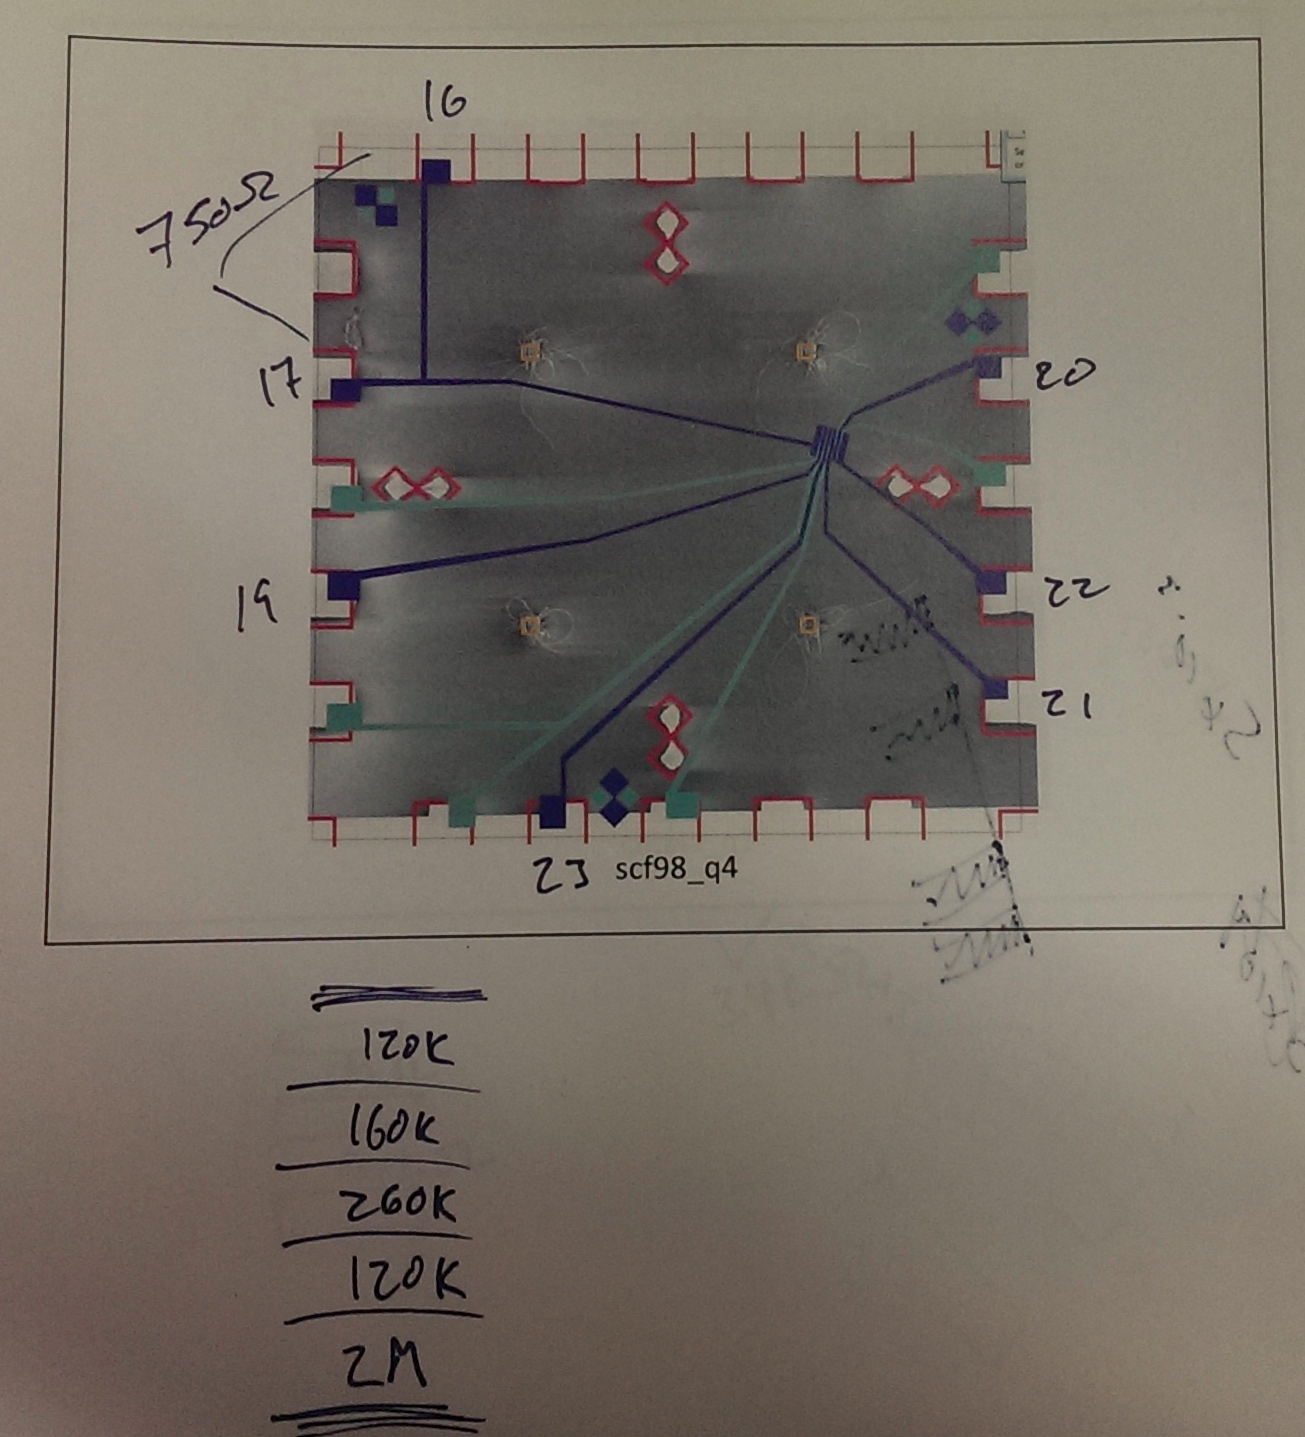

In [5]:
fig_dir = '/Volumes/EDDropbox/Data/SCF98/figures/'
from IPython.display import display, Image

display(Image(os.path.join(fig_dir, 'scf98_q2.jpg')))
display(Image(os.path.join(fig_dir, 'scf98_q4.jpg')))

Data was taken at 2 different temperatures in the dilution fridge.

## 500mK
### Gate Sweep

In [3]:
data_dir = '/Volumes/EDDropbox/Data/SCF98/q2/500mK/'
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*gate-i*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'gate-i_11-12_24_b' 


/Volumes/EDDropbox/Data/SCF98/q2/500mK/gate-i_11-12_24_b.bin
trying --  /Volumes/EDDropbox/Data/SCF98/q2/500mK/gate-i_11-12_24_b.bin


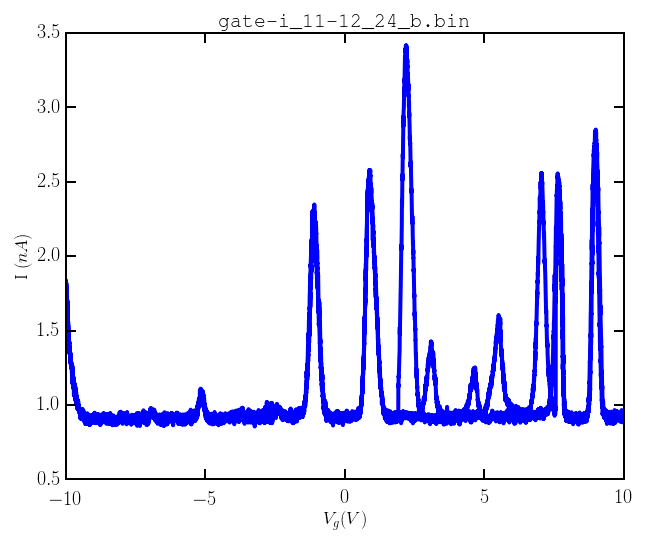

In [4]:
for f in flist:
    print f
    if os.path.isfile(f):
        try:
            print 'trying -- ', f
            df = lvdt.get_data_2d(f)

            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.plot(df['Gate'], df['Iavg']*1e9)
            ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'I $(nA)$')
        except ValueError, msg:
            print msg

### Bias/Gate Sweep

In [5]:
data_dir = '/Volumes/EDDropbox/Data/SCF98/q2/500mK/'

# if I look for log files, I can ignore all of the time series files for now
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*vi-gate*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'vi-gate_11-12_23_e' 
1 -- 'vi-gate_11-12_23_c' 


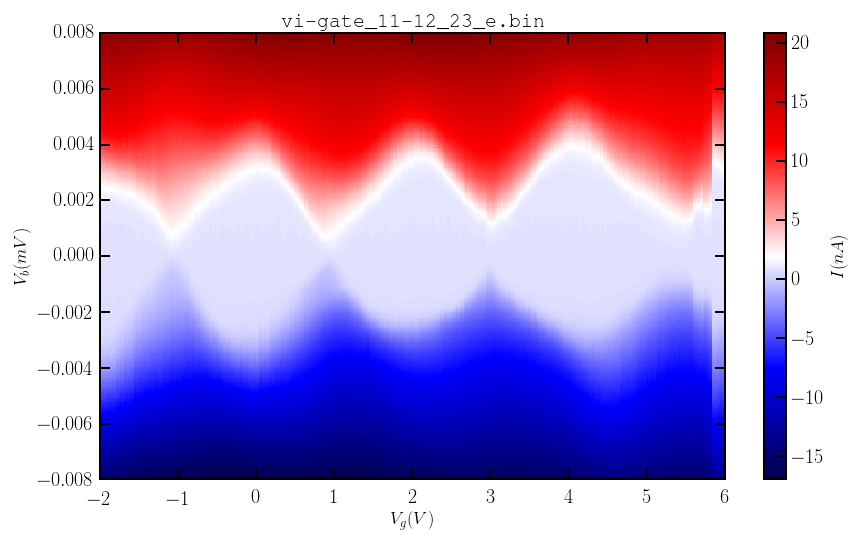

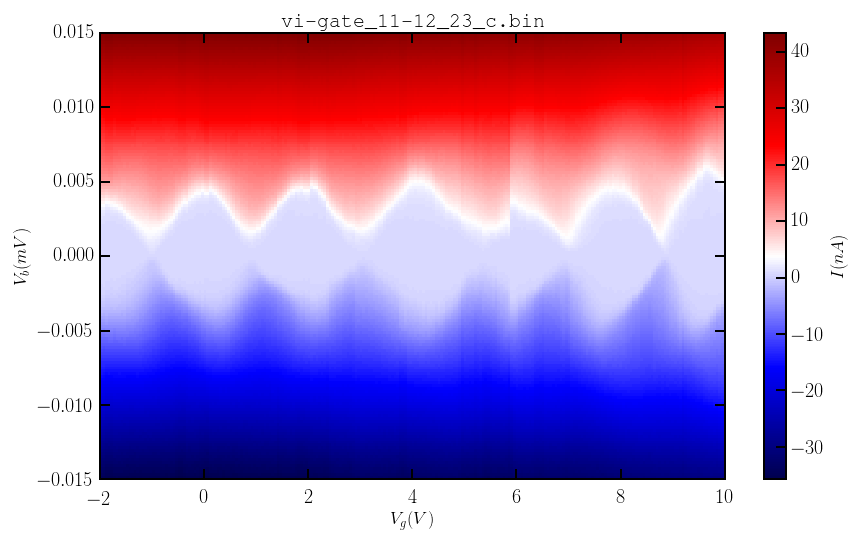

In [6]:
for f in flist:
    if os.path.isfile(f):
        try:
            df = lvdt.get_data_3d(f)
            df = df.groupby(df.index).mean()

            fig = plt.figure(figsize=(14,8))
            ax = fig.add_subplot(1,1,1)
            limits = lvdt.df_extent(df)
            im = ax.imshow(df*1e9, extent = limits, 
                           cmap = plt.cm.seismic,
                           origin = 'lower', aspect = 'auto', interpolation = 'nearest')
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'$V_b (mV)$')
            ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
            cb = plt.colorbar(im)
            cb.set_label(r'$I (nA)$')
        except ValueError, msg:
            print msg

## 150mK

### Gate Sweep

In [7]:
data_dir = '/Volumes/EDDropbox/Data/SCF98/q2/150mK/'
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*gate-i*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'gate-i_11-12_24_a' 


/Volumes/EDDropbox/Data/SCF98/q2/150mK/gate-i_11-12_24_a.bin
trying --  /Volumes/EDDropbox/Data/SCF98/q2/150mK/gate-i_11-12_24_a.bin


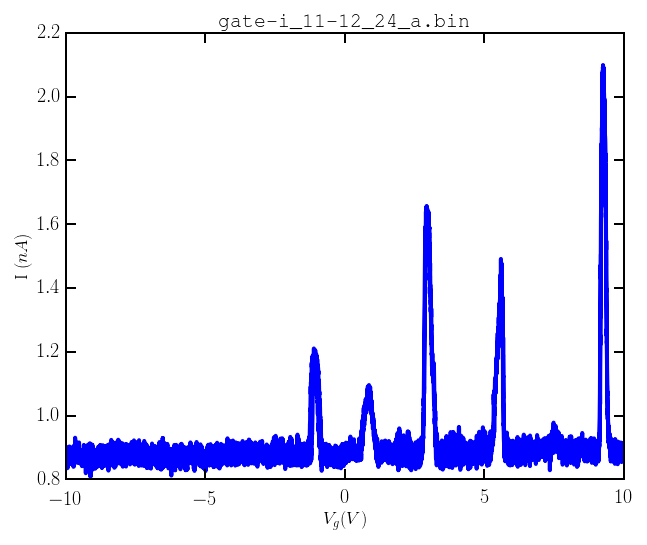

In [8]:
for f in flist:
    print f
    if os.path.isfile(f):
        try:
            print 'trying -- ', f
            df = lvdt.get_data_2d(f)

            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.plot(df['Gate'], df['Iavg']*1e9)
            ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'I $(nA)$')
        except ValueError, msg:
            print msg

In [9]:
data_dir = '/Volumes/EDDropbox/Data/SCF98/q2/150mK/'

# if I look for log files, I can ignore all of the time series files for now
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*vi-gate*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'vi-gate_11-12_23_i' 
1 -- 'vi-gate_11-12_23_h' 
2 -- 'vi-gate_11-12_23_f' 
3 -- 'vi-gate_11-12_23_g' 


total size of new array must be unchanged


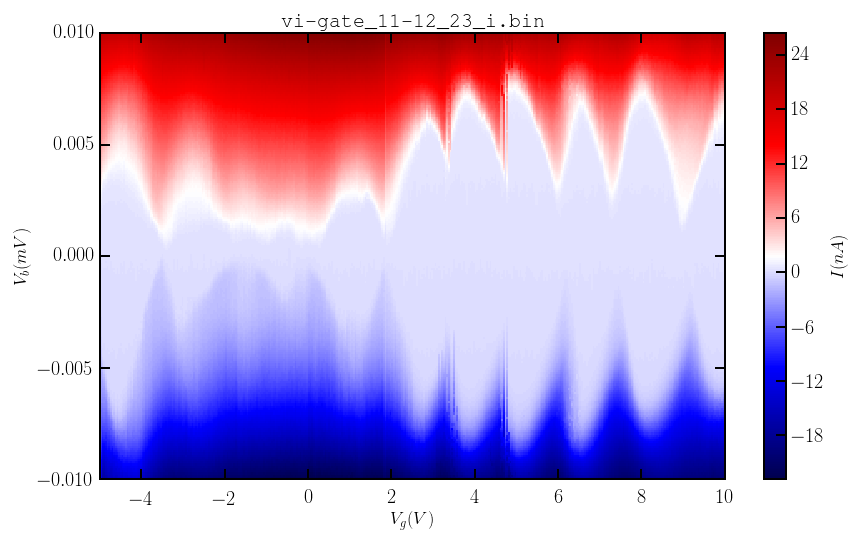

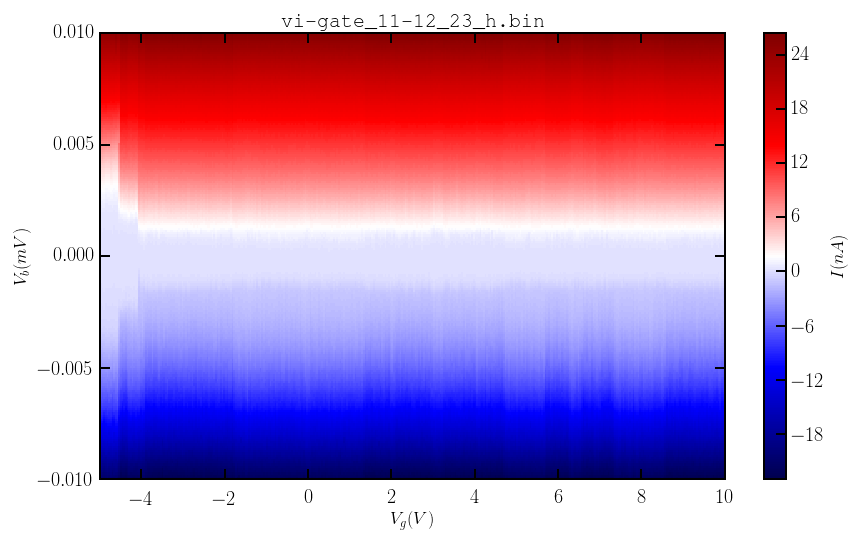

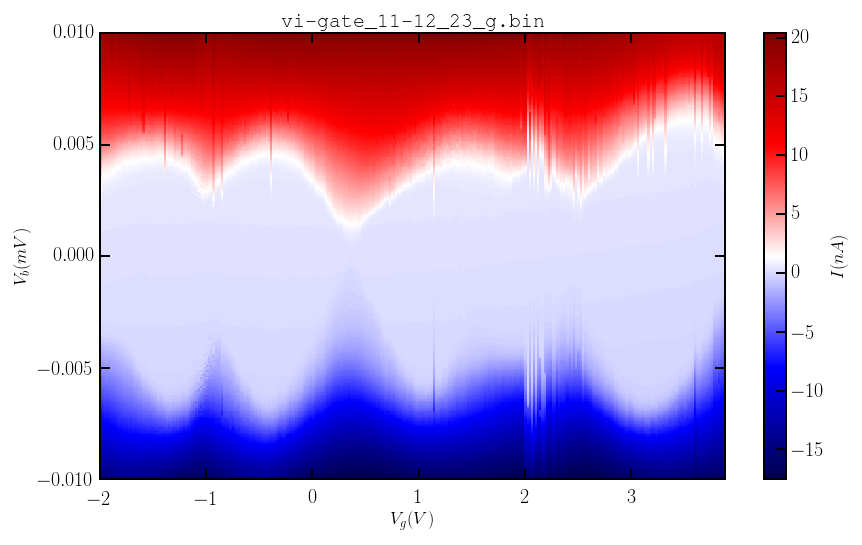

In [10]:
for f in flist:
    if os.path.isfile(f):
        try:
            df = lvdt.get_data_3d(f)
            df = df.groupby(df.index).mean()

            fig = plt.figure(figsize=(14,8))
            ax = fig.add_subplot(1,1,1)
            limits = lvdt.df_extent(df)
            im = ax.imshow(df*1e9, extent = limits, 
                           cmap = plt.cm.seismic,
                           origin = 'lower', aspect = 'auto', interpolation = 'nearest')
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'$V_b (mV)$')
            ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
            cb = plt.colorbar(im)
            cb.set_label(r'$I (nA)$')
        except ValueError, msg:
            print msg

### Field Sweeps

In [11]:
data_dir = '/Volumes/EDDropbox/Data/SCF98/q2/150mK/'

# if I look for log files, I can ignore all of the time series files for now
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*bi*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'bi_11-12_23_b' 
1 -- 'bi_11-12_23_a' 


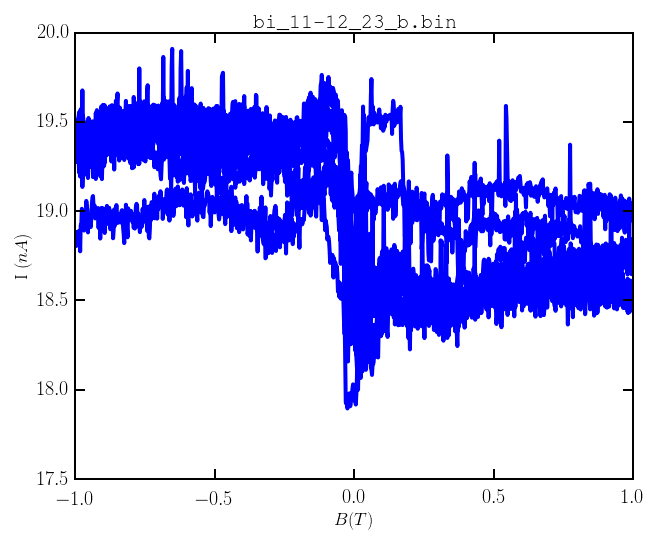

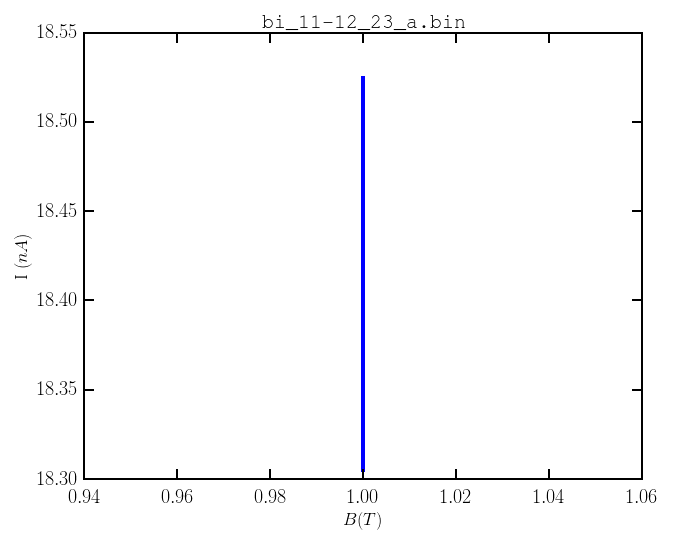

In [12]:
for f in flist:
    if os.path.isfile(f):
        try:
            df = lvdt.get_data_2d(f)

            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.plot(df['Field'], df['Iavg']*1e9)
            ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
            ax.set_xlabel(r'$B (T)$')
            ax.set_ylabel(r'I $(nA)$')
        except ValueError, msg:
            print msg